In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
X = np.array([[ 1, 2, 3, 4],   # shape: (8, 4)
              [11,12,13,14],
              [21,22,23,24],
              [31,32,33,34],
              [41,42,43,44],
              [51,52,53,54],
              [61,62,63,64],
              [71,72,73,74]])
y = np.array([0,0,0,0,0,0,0,0])  # shape: (8, )
stratifiedkfold = StratifiedKFold(n_splits=4, shuffle= True)   #, random_state=0, shuffle=True)
list(stratifiedkfold.split(X,y))


[(array([1, 2, 3, 4, 6, 7]), array([0, 5])),
 (array([0, 1, 2, 3, 5, 7]), array([4, 6])),
 (array([0, 2, 3, 4, 5, 6]), array([1, 7])),
 (array([0, 1, 4, 5, 6, 7]), array([2, 3]))]

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[ 1, 2, 3, 4],   # shape: (8, 4)
              [11,12,13,14],
              [21,22,23,24],
              [31,32,33,34],
              [41,42,43,44],
              [51,52,53,54],
              [61,62,63,64],
              [71,72,73,74]])
y = np.array([0,0,0,0,0,0,0,0])  # shape: (8, )
stratifiedkfold = StratifiedKFold(n_splits=4)   #, random_state=0, shuffle=True)
list(stratifiedkfold.split(X,y))
k=5
kfold = KFold(n_splits = k, shuffle=True)


In [ ]:
for train_index, test_index in kfold.split(X,y):
    print("train:",train_index, "test:",test_index)

train: [1 2 3 5 6 7] test: [0 4]
train: [0 1 3 4 5 6] test: [2 7]
train: [0 1 2 4 5 7] test: [3 6]
train: [0 1 2 3 4 6 7] test: [5]
train: [0 2 3 4 5 6 7] test: [1]


In [ ]:
df= pd.read_csv('sonar3.csv', header=None)
df

X= df.iloc[:,0:60]
y= df.iloc[:,60]


k= 5
kfold = KFold(n_splits=k, shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
acc_score=[]
def model_fn():
    model= Sequential()
    model.add(Dense(20, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
for train_index, test_index in kfold.split(X):
    X_train, X_test= X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]

    model= model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history= model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

    accuracy= model.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7788 - loss: 0.6107  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8527 - loss: 0.3507  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7897 - loss: 0.4417 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9037 - loss: 0.2595  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7703 - loss: 0.6047  


In [ ]:
avg_acc_score= sum(acc_score)/k
print('정확도:',acc_score)
print('정확도 평균:',avg_acc_score)

정확도: [0.761904776096344, 0.8571428656578064, 0.8095238208770752, 0.9024389982223511, 0.7804877758026123]
정확도 평균: 0.8222996473312378


In [ ]:
#dropna의 옵션
#axis = index, column
#how = all(모든값이 np.nan인 경우 만 제거), any(np.nan값이 하나라도 있으면 제거)
#tresh = 남아있는 값(결측값이 아닌 값)이 몇개여야 행/열을 유지할지
#subset = 특정 행/열에 대해서만 dropna를 적용
#isplace = 원본에 dropna의 결과를 반영할 지 여부

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('wine.csv',header= None)
X= df.iloc[:,0:12]
y= df.iloc[:,12]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle= True)
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 992 (3.88 KB)

 Trainable params: 992 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7878 - loss: 0.8649 - val_accuracy: 0.7846 - val_loss: 0.4876
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7736 - loss: 0.5039 - val_accuracy: 0.8854 - val_loss: 0.3231
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8864 - loss: 0.3435 - val_accuracy: 0.9115 - val_loss: 0.2668
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8907 - loss: 0.3179 - val_accuracy: 0.9185 - val_loss: 0.2452
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9136 - loss: 0.2615 - val_accuracy: 0.9400 - val_loss: 0.2023
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9272 - loss: 0.2480 - val_accuracy: 0.9423 - val_loss: 0.1959
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9322 - loss: 0.2296 - val_accuracy: 0.9431 - val_loss: 0.1902
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9365 - loss: 0.2164 - val_accuracy: 0.9431 - val_loss: 0.1884
Epoch 9

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

<Axes: >

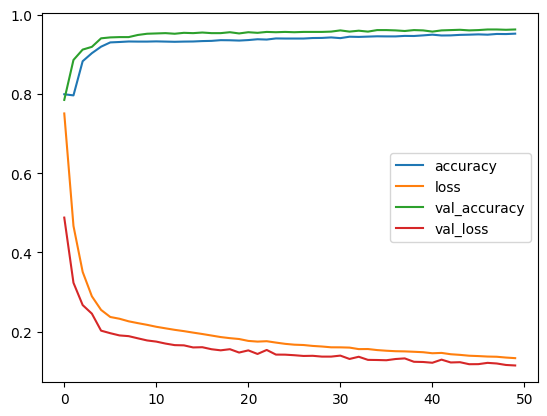

In [ ]:
df_history= pd.DataFrame(history.history)
df_history.plot()

In [ ]:
score=model.evaluate(X_test, y_test)
score

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.1708 


[0.15859660506248474, 0.9361538290977478]

In [ ]:
print("모델의 정확도{:.2f}".format(score[1]*100))

모델의 정확도93.62


In [ ]:
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:4f}.keras"
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath,  verbose=1)
history= model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, callbacks=[checkpointer])
score = model.evaluate(X_test, y_test)
print("모델의 정확도{:.2f}".format(score[1]*100))

Epoch 1/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9520 - loss: 0.1458
Epoch 1: saving model to ./data/model/all/01-0.960769.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9500 - loss: 0.1365 - val_accuracy: 0.9608 - val_loss: 0.1113
Epoch 2/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9620 - loss: 0.1178
Epoch 2: saving model to ./data/model/all/02-0.963077.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9534 - loss: 0.1303 - val_accuracy: 0.9631 - val_loss: 0.1146
Epoch 3/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9360 - loss: 0.1530
Epoch 3: saving model to ./data/model/all/03-0.962308.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9496 - loss: 0.1376 - val_accuracy: 0.9623 - val_loss: 0.1099
Epoch 4/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9480 - loss: 0.1316
Epoch 4: saving model to ./data/model/all/04-0.963077.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9521 - loss: 0.1271 - val_accuracy

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)
import matplotlib.pyplot as plt
import numpy as np
hist_df = pd.DataFrame(history.history)
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize= 2 ,label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize= 2 ,label='Trainset_loss')
plt.legend(loc= 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9704 - loss: 0.0945 - val_accuracy: 0.9685 - val_loss: 0.0782
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 0.0989 - val_accuracy: 0.9692 - val_loss: 0.0800
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.1002 - val_accuracy: 0.9685 - val_loss: 0.0782
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9680 - loss: 0.0937 - val_accuracy: 0.9738 - val_loss: 0.0793
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9725 - loss: 0.0813 - val_accuracy: 0.9677 - val_loss: 0.0882
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9746 - loss: 0.0855 - val_accuracy: 0.9708 - val_loss: 0.0867
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9751 - loss: 0.0788 - val_accuracy: 0.9708 - val_loss: 0.0836
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9760 - loss: 0.0819 - val_accuracy: 0.9746 - val_loss

KeyboardInterrupt: 

<Axes: >

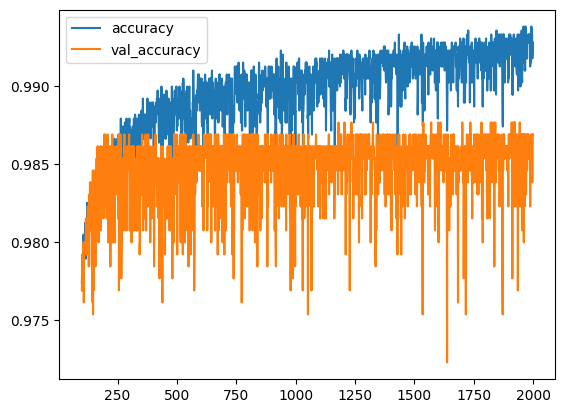

In [ ]:
hist_df[['accuracy','val_accuracy']][100:].plot()

In [ ]:
#inplace= 지금 일어난 변경사항을 원본 변수에 완전히 적용
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = './data/model/Ch14-4-bestmodel.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=0, monitor='val_loss',save_best_only=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose= 1,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9810 - loss: 0.0549 - val_accuracy: 0.9792 - val_loss: 0.0556
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0517 - val_accuracy: 0.9838 - val_loss: 0.0479
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9885 - loss: 0.0451 - val_accuracy: 0.9815 - val_loss: 0.0545
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9838 - val_loss: 0.0437
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9901 - loss: 0.0438 - val_accuracy: 0.9846 - val_loss: 0.0433
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9894 - loss: 0.0425 - val_accuracy: 0.9862 - val_loss: 0.0406
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9890 - loss: 0.0421 - val_accuracy: 0.9846 - val_loss: 0.0426
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9875 - loss: 0.0429 - val_accuracy: 0.9831 - val_

<Axes: >

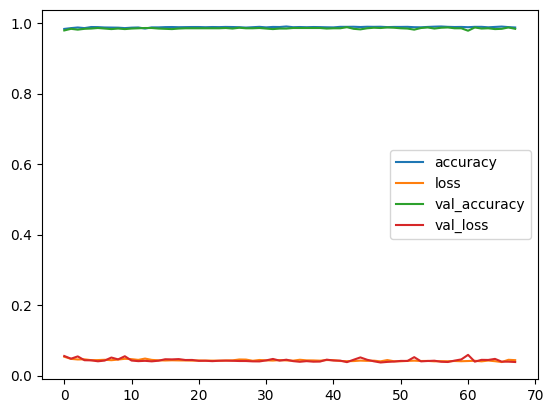

In [ ]:
df_history = pd.DataFrame(history.history)
df_history.plot()

In [ ]:
print(f"ignore_index를 쓰지 않으면 : \n {pd.concat([df1,df2])}")
print('\n')
print(f"ignore_index를 쓰면 : \n {pd.concat([df1,df2], ignore_index = True)}")

NameError: name 'df1' is not defined

In [ ]:
#데이터 분석
df= pd.read_csv('house_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.shape
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [ ]:
df.MSZoning.value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [ ]:
df.Utilities.value_counts()

,count
Utilities,
AllPub,1459
NoSeWa,1


In [ ]:
#데이터 정제:결측치 카테고리 변수 처리(one hot encoding)
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #null 값이 있는 갯수(속성별)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [ ]:
df.isnull().sum()[df.isnull().sum()>500]

,0
Alley,1369
MasVnrType,872
FireplaceQu,690
PoolQC,1453
Fence,1179
MiscFeature,1406


In [ ]:
##속성별로 결측치가 몇 개인지(내림차순)
df.isnull().sum().sort_values(ascending= False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [ ]:
df.shape

(1460, 81)

In [ ]:
#원핫 인코딩
df_onehot=pd.get_dummies(df)
df_onehot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#결측치가 하나라도 있는 데이터를 삭제(저장안됨)
df_onehot.dropna(how='any') #하나라도 na가 있으면 삭제(defult값)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
## 각 row의 모든 값이 na일때만 삭제
df_onehot.dropna(how='all') #하나도 삭제가 안됨(전체가 na인 데이터는 없음)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#결측치 처리
df_onehot.mean()

,0
Id,730.500000
MSSubClass,56.897260
LotFrontage,70.049958
LotArea,10516.828082
OverallQual,6.099315
OverallCond,5.575342
YearBuilt,1971.267808
YearRemodAdd,1984.865753
MasVnrArea,103.685262
BsmtFinSF1,443.639726


In [ ]:
df_onehot =df_onehot.fillna(df_onehot.mean())
df_onehot ##결측치가 없어짐

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#3.속성별 관련도 추출
df_onehot.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [ ]:
# 집값(saleprice) 내림차순으로 정렬
df_onehot.corr().sort_values('SalePrice', ascending= False).SalePrice

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
BsmtQual_Ex,0.553105
TotRmsAbvGrd,0.533723


In [ ]:
##데이터 사이 상관관계를 변수 저장
df_corr = df_onehot.corr()
df_corr[df_corr.LotArea > 0.3]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
LandContour_Low,-0.008845,-0.032201,0.045367,0.359475,-0.046563,-0.034591,-0.006969,-0.011806,-0.033415,0.127915,...,-0.009321,-0.048012,-0.007215,0.035976,0.008869,-0.008334,-0.014474,-0.018738,0.028317,-0.032868
LandSlope_Sev,-0.029608,-0.017184,0.022437,0.540380,-0.043725,-0.009697,-0.041169,-0.037184,-0.013447,0.063672,...,-0.005556,-0.028621,-0.004301,0.036994,0.031626,-0.004968,-0.008629,0.051556,-0.031676,-0.002945


In [ ]:
##집값과 관련이 큰것 부터 순서대로
df_corr_sort=df_corr.sort_values('SalePrice', ascending= False)
df_corr_sort

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,...,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,...,-0.022348,0.168368,-0.036522,-0.121102,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,...,-0.044502,0.286290,-0.087089,-0.197458,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,...,-0.041904,0.296671,-0.080601,-0.218665,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageType_Detchd,0.003919,0.062966,-0.243313,-0.126094,-0.337227,0.183224,-0.487130,-0.310921,-0.184065,-0.212286,...,0.017921,-0.158915,-0.027251,0.124432,0.038087,-0.001789,-0.003108,0.022678,0.082693,-0.156037
GarageFinish_Unf,-0.007513,-0.008807,-0.188336,-0.068099,-0.422479,0.203629,-0.523233,-0.414376,-0.222367,-0.179000,...,-0.001712,-0.238934,-0.007466,0.172316,0.039162,-0.017490,0.062021,0.044406,0.118008,-0.232554
BsmtQual_TA,0.033795,-0.138741,-0.066531,-0.044874,-0.497957,0.280779,-0.631734,-0.495485,-0.187406,-0.121785,...,0.018342,-0.265143,-0.010153,0.161940,0.103767,0.005852,-0.050903,0.060591,0.113021,-0.258953
KitchenQual_TA,-0.014973,-0.010836,-0.136764,-0.031154,-0.553891,0.046947,-0.459792,-0.576964,-0.195807,-0.108876,...,-0.012126,-0.274335,0.045067,0.178612,0.065613,0.025849,0.060068,0.034549,0.128151,-0.273826


In [ ]:
#집값과 관련도가 가장 큰 10개의 속성
df_corr_sort['SalePrice'].head(6)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581


In [ ]:
list(df_corr_sort['SalePrice'].head(6).index)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

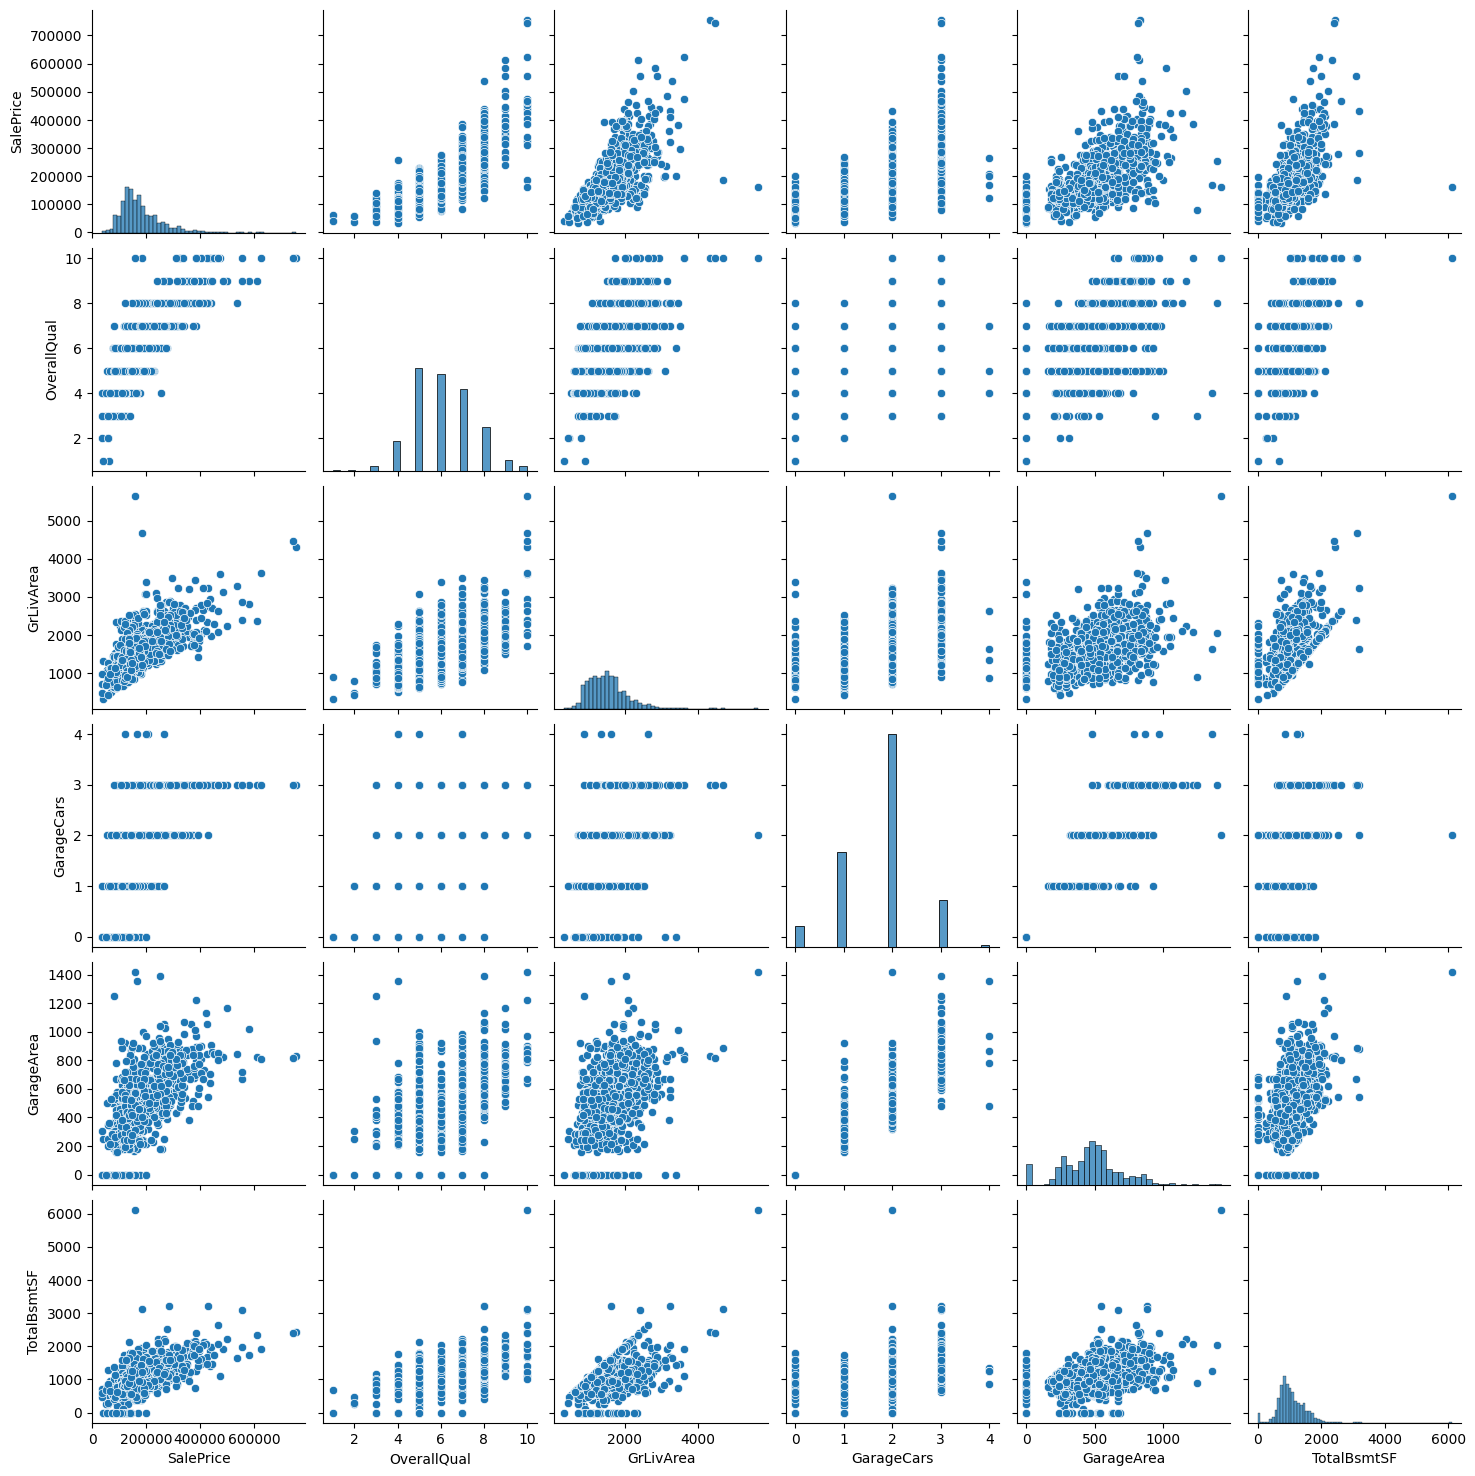

In [ ]:
#집값과 관련이 가장 높은 속성 추출한것으로 상관도 그래프
import seaborn as sns
import matplotlib.pyplot as plt
cols = list(df_corr_sort['SalePrice'].head(6).index)
cols
sns.pairplot(df_onehot[cols])

In [ ]:
#4. 주택가격 예측 모델
#학습데이터 컬럼
cols_train = cols[1:] #saleprice 제외
cols_train

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

In [ ]:
X_train_pre=df_onehot[cols_train]

In [ ]:
# 타겟 데이터(y): 집값
y= df_onehot['SalePrice'].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test= train_test_split(X_train_pre, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 5), (292, 5), (1168,), (292,))

In [ ]:
## 모델 구축
model = Sequential()
model.add(Dense(10, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1)) #회귀이므로 activation이 없음
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 35)                  │             385 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 45)                  │           1,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              46 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,111 (8.25 KB)

 Trainable params: 2,111 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#콜백 함수 설정
early_stopping_callback = EarlyStopping(monitor= 'val_loss', patience=20)
modelpath= './data/model/ames_house_model.keras'
checkpointer = ModelCheckpoint(filepath= modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
##학습실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 38109315072.0000 - val_loss: 42202324992.0000
Epoch 2/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36162199552.0000 - val_loss: 41758486528.0000
Epoch 3/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36318699520.0000 - val_loss: 40849100800.0000
Epoch 4/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35252305920.0000 - val_loss: 38840926208.0000
Epoch 5/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34723794944.0000 - val_loss: 34765864960.0000
Epoch 6/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29654466560.0000 - val_loss: 27550220288.0000
Epoch 7/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22190895104.0000 - val_loss: 17581901824.0000
Epoch 8/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13263475712.0000 - val_loss: 8109895168.0000
Epoch 9/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6196160000.0000 - val_loss: 3307559168.0000
Epoch 10/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

<Axes: >

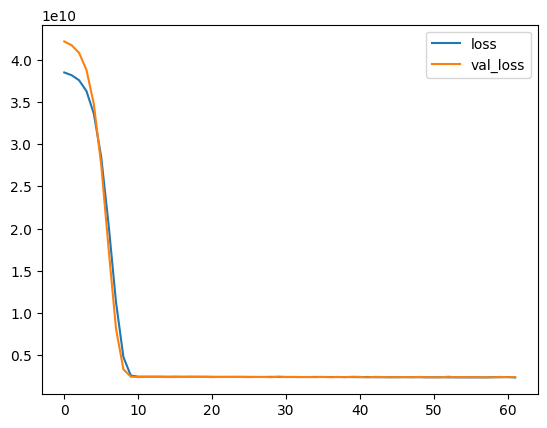

In [ ]:
df_history = pd.DataFrame(history.history)
df_history.plot()

In [ ]:
print(X_test)
print(y_test)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF
422             5        988           2         520          988
1158            8       1580           3         830         1580
388             7       1479           2         577         1468
462             5        864           1         360          864
227             6        987           1         280          483
...           ...        ...         ...         ...          ...
800             6       1688           2         603          616
1242            7       1173           2         528         1053
593             6        848           2         420          848
384             6       1953           2         501         1580
408             7       2172           3         947         1063

[292 rows x 5 columns]
[113000 235128 191000  62383 106000 187000 328000 136500  89000 275500
 210000  94750 175000 235000 290000 160200 303477 129500 201000 410000
 180500 133500 129000 121600 243000  40000

In [ ]:
model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[144559.4  ],
       [231089.14 ],
       [205434.84 ],
       [121587.77 ],
       [105826.57 ],
       [178069.75 ],
       [246748.67 ],
       [144091.53 ],
       [ 84105.945],
       [239531.75 ],
       [187675.02 ],
       [136669.6  ],
       [208211.39 ],
       [227603.34 ],
       [276868.84 ],
       [157018.03 ],
       [264638.94 ],
       [120869.19 ],
       [215420.61 ],
       [356794.12 ],
       [196687.03 ],
       [120448.125],
       [129857.01 ],
       [136977.17 ],
       [236709.48 ],
       [134816.14 ],
       [156175.36 ],
       [110060.86 ],
       [141831.62 ],
       [104983.445],
       [141695.95 ],
       [257967.03 ],
       [154073.62 ],
       [137444.94 ],
       [163605.92 ],
       [168682.58 ],
       [254293.1  ],
       [181037.28 ],
       [163346.78 ],
       [164839.58 ],
       [136571.58 ],
       [157346.88 ],
       [191822.16 ],
       [122776.07 ],
       [102796.86 ],
       [198929.1  ],
       [196082.6  ],
       [15507

In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []
# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
실제가격: 113000.00, 예상가격: 144559.41
실제가격: 235128.00, 예상가격: 231089.14
실제가격: 191000.00, 예상가격: 205434.84
실제가격: 62383.00, 예상가격: 121587.77
실제가격: 106000.00, 예상가격: 105826.57
실제가격: 187000.00, 예상가격: 178069.75
실제가격: 328000.00, 예상가격: 246748.67
실제가격: 136500.00, 예상가격: 144091.53
실제가격: 89000.00, 예상가격: 84105.95
실제가격: 275500.00, 예상가격: 239531.75
실제가격: 210000.00, 예상가격: 187675.02
실제가격: 94750.00, 예상가격: 136669.59
실제가격: 175000.00, 예상가격: 208211.39
실제가격: 235000.00, 예상가격: 227603.34
실제가격: 290000.00, 예상가격: 276868.84
실제가격: 160200.00, 예상가격: 157018.03
실제가격: 303477.00, 예상가격: 264638.94
실제가격: 129500.00, 예상가격: 120869.19
실제가격: 201000.00, 예상가격: 215420.61
실제가격: 410000.00, 예상가격: 356794.12
실제가격: 180500.00, 예상가격: 196687.03
실제가격: 133500.00, 예상가격: 120448.12
실제가격: 129000.00, 예상가격: 129857.01
실제가격: 121600.00, 예상가격: 136977.17
실제가격: 243000.00, 예상가격: 236709.48


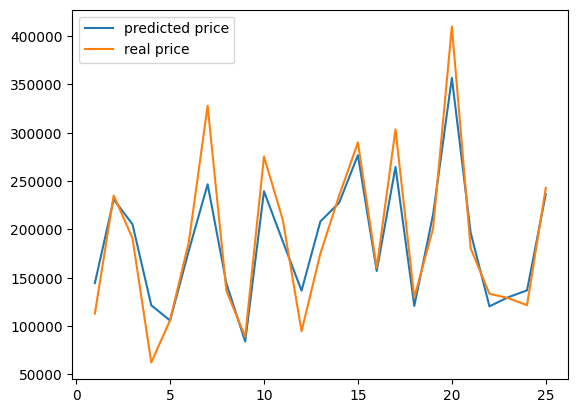

In [ ]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

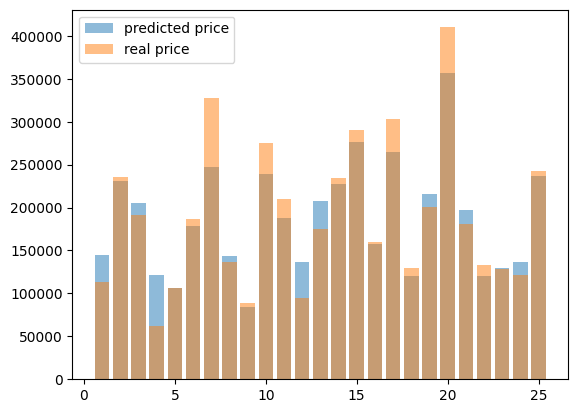

In [ ]:
plt.bar(X_num, pred_prices, label='predicted price', alpha=0.5)
plt.bar(X_num, real_prices, label='real price', alpha=0.5)
plt.legend()

plt.show()

In [12]:
import numpy as np
from PIL import Image
# img = Image.open("C:/data/test_images/daisy1.png")
hodol_img = Image.open("호돌이.jpg")
hodol_img_array = np.array(hodol_img)
print(hodol_img_array.shape)
hodol_img_array

file_name = 'daisy.JPG'
image_path = image_folder + file_name
image_path

import numpy as np
image1_array = np.array(image1)   # np.asarray(image1) 과 동일
# image1_array = np.asarray(image1)

image1.rotate(90)   ## shape는 그대로, 위아래 잘리고 빈공간은 black

image = Image.open(image_path)

(576, 508, 3)


NameError: name 'image_folder' is not defined

In [11]:
doggy_jpg = Image.open("doggy.PNG")
# display(doggy_jpg)
doggy_jpg

doggy_jpg_array = np.array(doggy_jpg)

doggy_png_array = np.array(doggy_jpg)
print(doggy_png_array.shape)
doggy_png_array

# 흰색-투명으로 이미지와 같은 크기 이미지 하나 더 만들기
txt_png = Image.new('RGBA', doggy_jpg.size, (255,255,255,0))
d = ImageDraw.Draw(txt_png)
d

# font = ImageFont.truetype("arial.ttf", 20)
# font = ImageFont.truetype("batang.ttc", 30)  # 숫자는 폰트 크기
font = ImageFont.truetype("malgunbd.ttf", 30)  # HY견고딕 숫자는 폰트 크기
d.text((150,10), "멍멍이 달리다!!!", fill=(255,255,0,255), font=font)  # 위치, 텍스트, 노랑-불투명
d.text((50,200), "World", fill=(255,255,255,128), font=font)  # 위치, 텍스트, 흰색-반투명
Image.alpha_composite(doggy_png, txt_png)

NameError: name 'doggy' is not defined

In [17]:
# 16-1 MNIST : Data 읽기
##############################################################
from tensorflow.keras.datasets import mnist
import tensorflow as tf
# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

for line in X_train[0]:
    for cell in line:
        print("%3d" % cell, end=' ')
    print()

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28,28)
X_train = X_train.astype('float64')
X_train.shape

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253

(60000, 28, 28)

In [22]:
X_te = X_test.reshape(X_test.shape[0], 28*28).astype('float64')
X_tr = X_train.reshape(X_train.shape[0], 28*28).astype('float64')
X_train.shape, X_tr.shape

((60000, 28, 28), (60000, 784))

In [23]:
X_te = X_te / 255
X_tr[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [24]:
print('class: %d'%(Y_class_train[0]))
Y_class_train

class: 5


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
#One hot encoding(정답이 0,1,2,3...9: 총 10개 데이터)
tf.keras.utils.to_categorical(Y_class_train,10).shape, tf.keras.utils.to_categorical(Y_class_test,10)

((60000, 10),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [30]:
Y_train = tf.keras.utils.to_categorical(Y_class_train,10)
Y_test = tf.keras.utils.to_categorical(Y_class_test,10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='./data/model/mnist_mlp_model.keras', verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_tr, Y_train, validation_split=0.25, epochs=30, batch_size=200, verbose= 1,callbacks=[early_stopping_callback,checkpointer])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8072 - loss: 17.3410 - val_accuracy: 0.9349 - val_loss: 1.6815
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9514 - loss: 0.9188 - val_accuracy: 0.9451 - val_loss: 1.1614
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9707 - loss: 0.4031 - val_accuracy: 0.9517 - val_loss: 0.9111
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9777 - loss: 0.2358 - val_accuracy: 0.9541 - val_loss: 0.8494
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9828 - loss: 0.1690 - val_accuracy: 0.9557 - val_loss: 0.8396
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9849 - loss: 0.1450 - val_accuracy: 0.9553 - val_loss: 0.7973
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9857 - loss: 0.1376 - val_accuracy: 0.9572 - val_loss: 0.8356
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9860 - loss: 0.1347 - val_acc

In [38]:
model.evaluate(X_te, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9262 - loss: 1.7146


[1.6961456537246704, 0.9373999834060669]

In [39]:
model.predict(X_te[:5]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([7, 2, 1, 0, 4])

In [45]:
# ChatGPT를 활용해 작성한 코드를 붙여넣고 실행 해보세요
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

# 시드 설정
np.random.seed(42)
torch.manual_seed(42)

# 타이타닉 데이터셋 로드
data = pd.read_csv("./titanic.csv")

# 데이터 전처리
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.dropna()

X = data.drop('Survived', axis=1).values
y = data['Survived'].values

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch 데이터셋 및 데이터로더 정의
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# 신경망 모델 정의
class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.fc1 = nn.Linear(6, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 모델, 손실 함수, 옵티마이저 정의
model = TitanicModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# 모델 훈련
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor)
    y_pred = (y_pred_proba > 0.5).float()
    accuracy = accuracy_score(y_test, y_pred.numpy())
    print(f"테스트 정확도: {accuracy:.4f}")


Epoch [10/50], Loss: 0.6557
Epoch [20/50], Loss: 0.6355
Epoch [30/50], Loss: 0.6122
Epoch [40/50], Loss: 0.5859
Epoch [50/50], Loss: 0.5569
테스트 정확도: 0.7483


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

# 시드 설정
np.random.seed(42)
torch.manual_seed(42)

# 타이타닉 데이터셋 로드
data = pd.read_csv("./titanic.csv")

# 데이터 전처리
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.dropna()

X = data.drop('Survived', axis=1).values
y = data['Survived'].values

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch 데이터셋 및 데이터로더 정의
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# 신경망 모델 정의
class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.fc1 = nn.Linear(6, 64)  # 첫 번째 레이어의 뉴런 수 증가
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.3)  # 드롭아웃 추가

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# 모델, 손실 함수, 옵티마이저 정의
model = TitanicModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 학습률 조정

# 모델 훈련
epochs = 100  # 에포크 수 증가
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor)
    y_pred = (y_pred_proba > 0.5).float()
    accuracy = accuracy_score(y_test, y_pred.numpy())
    print(f"테스트 정확도: {accuracy:.4f}")

Epoch [10/100], Loss: 0.6734
Epoch [20/100], Loss: 0.6417
Epoch [30/100], Loss: 0.6027
Epoch [40/100], Loss: 0.5482
Epoch [50/100], Loss: 0.5156
Epoch [60/100], Loss: 0.4877
Epoch [70/100], Loss: 0.4616
Epoch [80/100], Loss: 0.4479
Epoch [90/100], Loss: 0.4390
Epoch [100/100], Loss: 0.4307
테스트 정확도: 0.7692
